<a href="https://colab.research.google.com/github/ravirajgm/Raviraj_LinearRegression/blob/main/Austin_Housing_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Austin Housing Exploratory Data Analysis**

This dataset covers the housing data of Austin which is considered as a prime market for real-estate prospects in 2021. The dataset includes all the key features of Housing including:
- Address & Zip code
- Property Tax
- Attributes of the house like - No. of rooms and size
- Neighborhood related info like - Avg rating of schools nearby



In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [ ]:
#Load the data into pandas dataframe
austindf = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/austinHousingData.csv')
austindf.head(2)

,zpid,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,hasCooling,hasGarage,hasHeating,hasSpa,hasView,homeType,parkingSpaces,yearBuilt,latestPrice,numPriceChanges,latest_saledate,latest_salemonth,latest_saleyear,latestPriceSource,numOfPhotos,numOfAccessibilityFeatures,numOfAppliances,numOfParkingFeatures,numOfPatioAndPorchFeatures,numOfSecurityFeatures,numOfWaterfrontFeatures,numOfWindowFeatures,numOfCommunityFeatures,lotSizeSqFt,livingAreaSqFt,numOfPrimarySchools,numOfElementarySchools,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,homeImage
0,111373431,pflugerville,14424 Lake Victor Dr,78660,"14424 Lake Victor Dr, Pflugerville, TX 78660 i...",30.430632,-97.663078,1.98,2,True,True,True,True,False,False,Single Family,2,2012,305000.0,5,2019-09-02,9,2019,"Coldwell Banker United, Realtors - South Austin",39,0,5,2,1,3,0,1,0,6011.0,2601.0,1,0,1,1,1.266667,2.666667,1063,14,3.0,4,2,111373431_ffce26843283d3365c11d81b8e6bdc6f-p_f...
1,120900430,pflugerville,1104 Strickling Dr,78660,Absolutely GORGEOUS 4 Bedroom home with 2 full...,30.432673,-97.661697,1.98,2,True,True,True,True,False,False,Single Family,2,2013,295000.0,1,2020-10-13,10,2020,Agent Provided,29,0,1,2,0,0,0,0,0,6185.0,1768.0,1,0,1,1,1.400000,2.666667,1063,14,2.0,4,1,120900430_8255c127be8dcf0a1a18b7563d987088-p_f...


In [ ]:
#View the dataframe details including Dtype to identify continuous [numerical] features and categorical [object] features.
austindf.shape

(15171, 47)

In [ ]:
austindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15171 entries, 0 to 15170
Data columns (total 47 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   zpid                        15171 non-null  int64  
 1   city                        15171 non-null  object 
 2   streetAddress               15171 non-null  object 
 3   zipcode                     15171 non-null  int64  
 4   description                 15171 non-null  object 
 5   latitude                    15171 non-null  float64
 6   longitude                   15171 non-null  float64
 7   propertyTaxRate             15171 non-null  float64
 8   garageSpaces                15171 non-null  int64  
 9   hasAssociation              15171 non-null  bool   
 10  hasCooling                  15171 non-null  bool   
 11  hasGarage                   15171 non-null  bool   
 12  hasHeating                  15171 non-null  bool   
 13  hasSpa                      151

In [ ]:
#Know about the Statistical summary of each feature within the dataset including count, mean, standard deviation and quantiles
austindf.describe()

,zpid,zipcode,latitude,longitude,propertyTaxRate,garageSpaces,parkingSpaces,yearBuilt,latestPrice,numPriceChanges,latest_salemonth,latest_saleyear,numOfPhotos,numOfAccessibilityFeatures,numOfAppliances,numOfParkingFeatures,numOfPatioAndPorchFeatures,numOfSecurityFeatures,numOfWaterfrontFeatures,numOfWindowFeatures,numOfCommunityFeatures,lotSizeSqFt,livingAreaSqFt,numOfPrimarySchools,numOfElementarySchools,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories
count,1.517100e+04,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,1.517100e+04,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,1.517100e+04,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000
mean,1.044193e+08,78735.932964,30.291596,-97.778532,1.994085,1.229187,1.224507,1988.554743,5.127677e+05,3.032892,6.733043,2019.078241,30.640432,0.012985,3.474722,1.710105,0.663371,0.466878,0.002768,0.208490,0.018852,1.190840e+05,2208.323314,0.940676,0.049173,1.035990,0.976798,1.838495,5.779912,1237.304660,14.857228,2.683010,3.440380,1.467273
std,3.179426e+08,18.893475,0.096973,0.084715,0.053102,1.352117,1.352732,21.579458,4.531853e+05,2.487392,3.146760,0.813941,21.175174,0.179438,1.893351,0.788641,0.983779,0.824481,0.061771,0.488331,0.206775,1.225272e+07,1378.576119,0.236516,0.234937,0.263633,0.292043,1.068376,1.860276,326.513311,1.741857,1.054445,0.849942,0.523697
min,2.858495e+07,78617.000000,30.085030,-98.022057,1.980000,0.000000,0.000000,1905.000000,5.500000e+03,1.000000,1.000000,2018.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+02,300.000000,0.000000,0.000000,0.000000,0.000000,0.200000,2.333333,396.000000,10.000000,0.000000,0.000000,1.000000
25%,2.941115e+07,78727.000000,30.203313,-97.838009,1.980000,0.000000,0.000000,1974.000000,3.090000e+05,1.000000,4.000000,2018.000000,20.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.534000e+03,1483.000000,1.000000,0.000000,1.000000,1.000000,1.100000,4.000000,966.000000,14.000000,2.000000,3.000000,1.000000
50%,2.949441e+07,78739.000000,30.284416,-97.769539,1.980000,1.000000,1.000000,1993.000000,4.050000e+05,2.000000,7.000000,2019.000000,29.000000,0.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.276000e+03,1975.000000,1.000000,0.000000,1.000000,1.000000,1.566667,5.778694,1287.000000,15.000000,3.000000,3.000000,1.000000
75%,7.033762e+07,78749.000000,30.366585,-97.717903,1.980000,2.000000,2.000000,2006.000000,5.750000e+05,4.000000,9.000000,2020.000000,39.000000,0.000000,4.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.089000e+04,2687.000000,1.000000,0.000000,1.000000,1.000000,2.266667,7.000000,1496.000000,16.000000,3.000000,4.000000,2.000000
max,2.146313e+09,78759.000000,30.517323,-97.569504,2.210000,22.000000,22.000000,2020.000000,1.350000e+07,23.000000,12.000000,2021.000000,179.000000,8.000000,12.000000,6.000000,8.000000,6.000000,2.000000,4.000000,8.000000,1.508483e+09,109292.000000,2.000000,2.000000,3.000000,2.000000,9.000000,9.500000,1913.000000,19.000000,27.000000,20.000000,4.000000


Looking at the above Stat summary, the mean Housing Price expectedly is in at least thousands whereas the mean of some of the features like Num.Of parking features, Num of Security features and Num of Bedrooms are in decimals. Hence scaling / normalization would be necessary for further analysis.

In [ ]:
#Identify the null values in the dataset to repair as necessary
austindf.isnull().sum()
#Looks like the dataset is clean with zero NaN and NaT values

zpid                          0
city                          0
streetAddress                 0
zipcode                       0
description                   0
latitude                      0
longitude                     0
propertyTaxRate               0
garageSpaces                  0
hasAssociation                0
hasCooling                    0
hasGarage                     0
hasHeating                    0
hasSpa                        0
hasView                       0
homeType                      0
parkingSpaces                 0
yearBuilt                     0
latestPrice                   0
numPriceChanges               0
latest_saledate               0
latest_salemonth              0
latest_saleyear               0
latestPriceSource             0
numOfPhotos                   0
numOfAccessibilityFeatures    0
numOfAppliances               0
numOfParkingFeatures          0
numOfPatioAndPorchFeatures    0
numOfSecurityFeatures         0
numOfWaterfrontFeatures       0
numOfWin

In [ ]:
#Plot the histogram and boxplot for numerical columns in the dataset
#Select numerical columns from the main dataset
dfnumericals = austindf.select_dtypes(include=np.number)
#dfnumericals

In [ ]:
#Filter down to the columns of interest which would assist in analysis - histogram & boxplot
dfnumericals = dfnumericals.drop(columns=['zpid','zipcode'], axis=1)

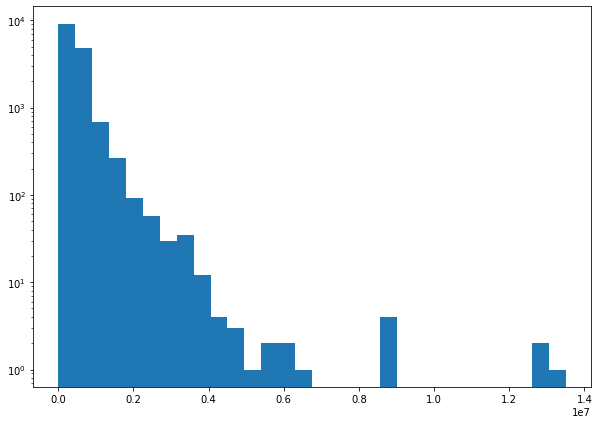

In [ ]:
#Since Price is of special significance, a log transformed histogram helps to identify the hidden data patterns
fig = plt.figure(figsize =(10, 7))
plt.yscale('log')
plt.xscale('linear')
# Creating plot
plt.hist(dfnumericals['latestPrice'], bins=30)
# show plot
plt.show()

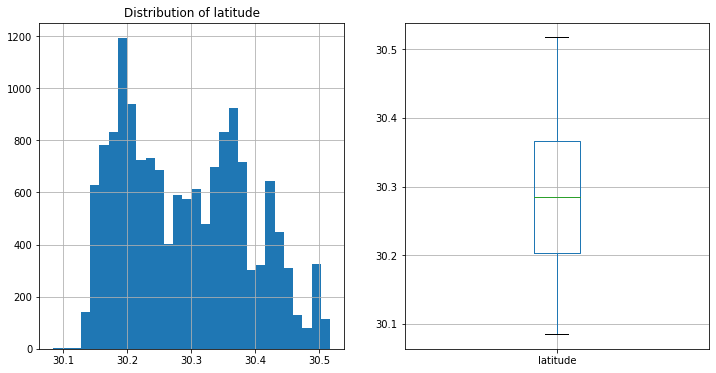

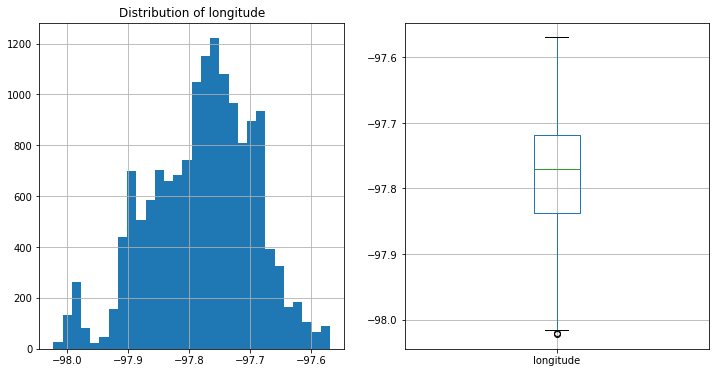

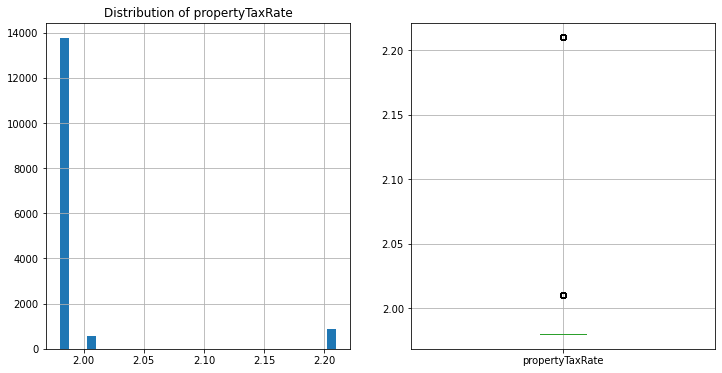

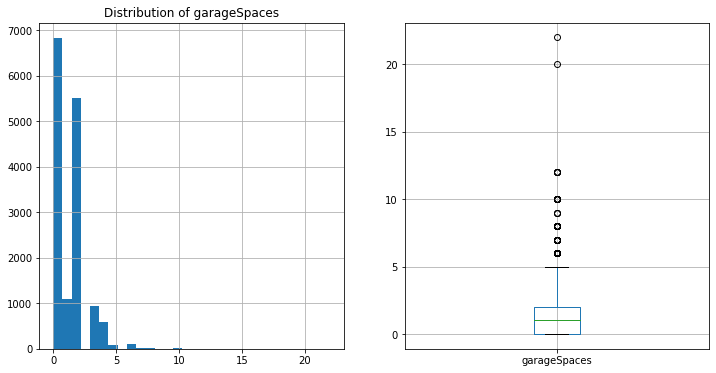

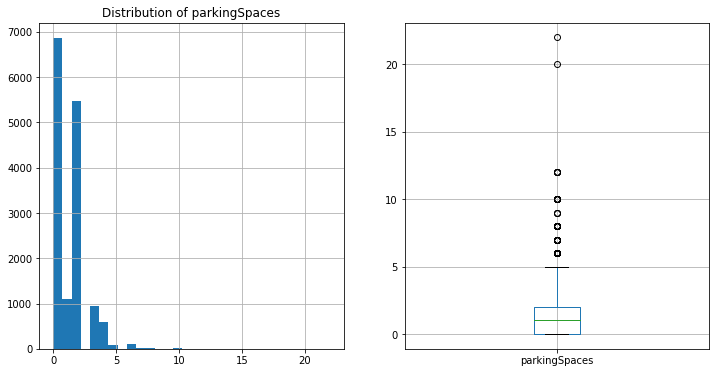

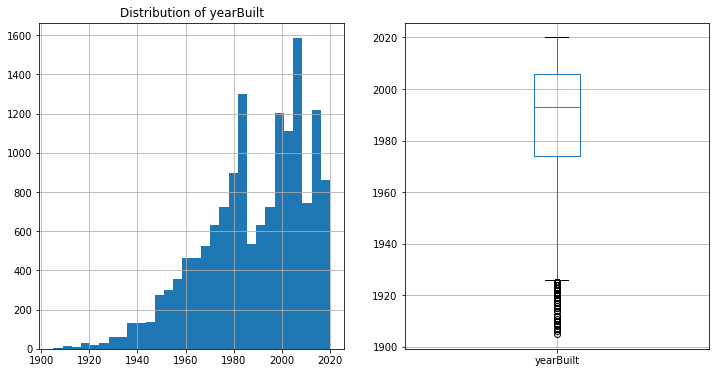

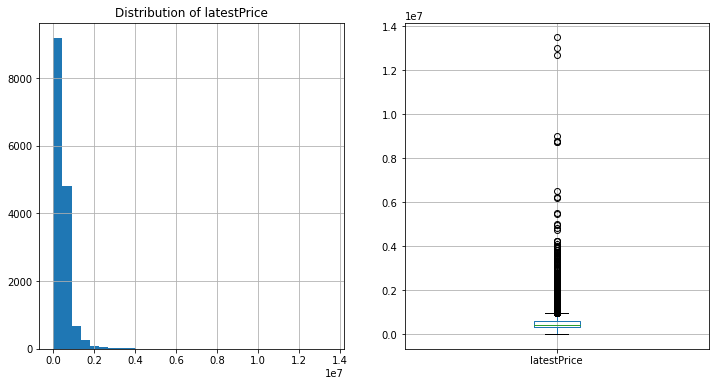

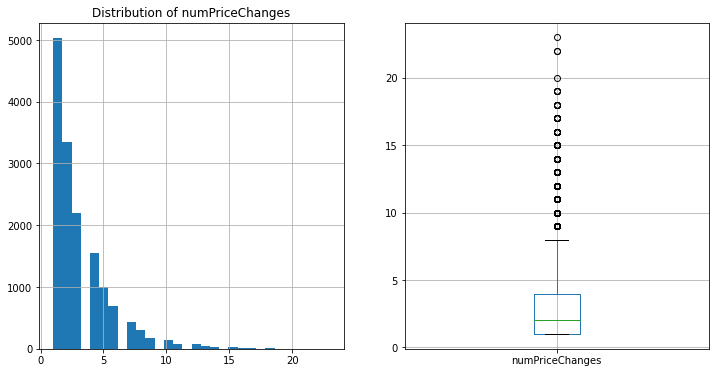

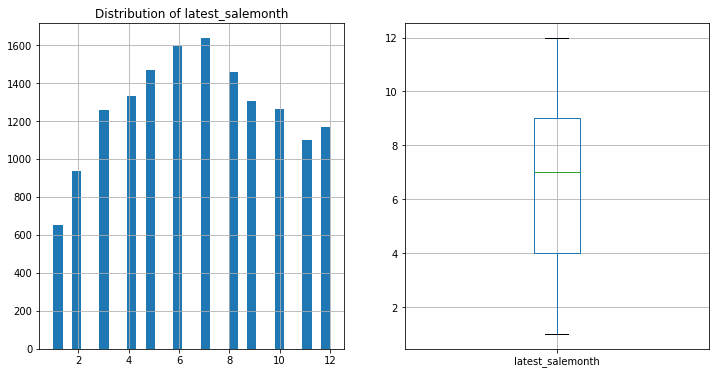

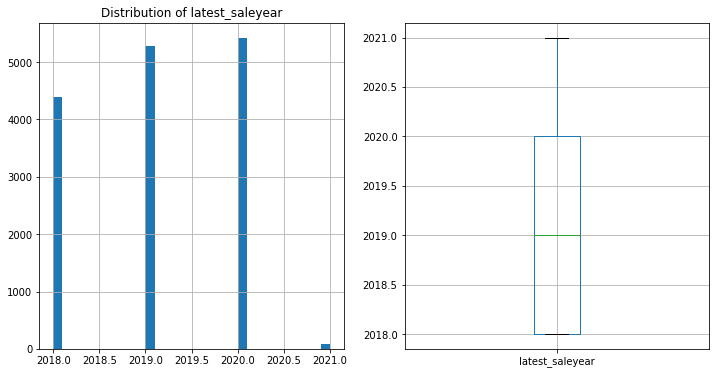

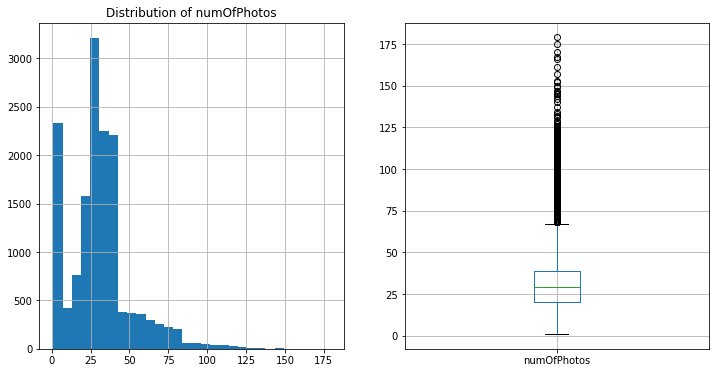

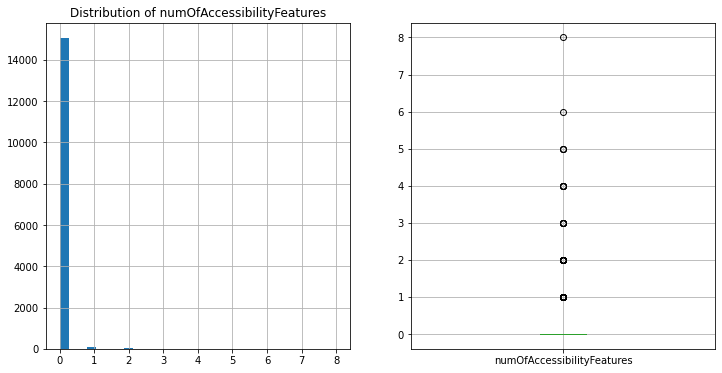

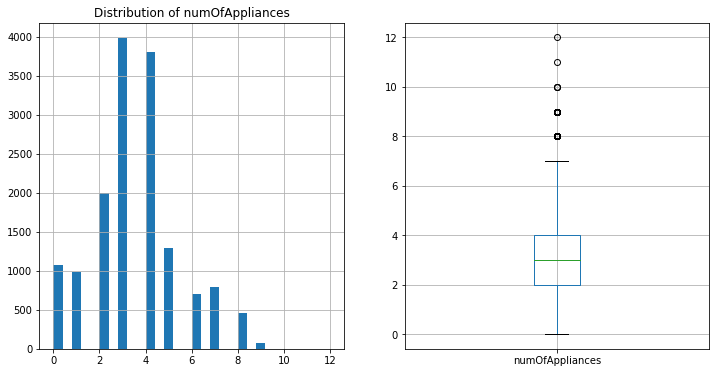

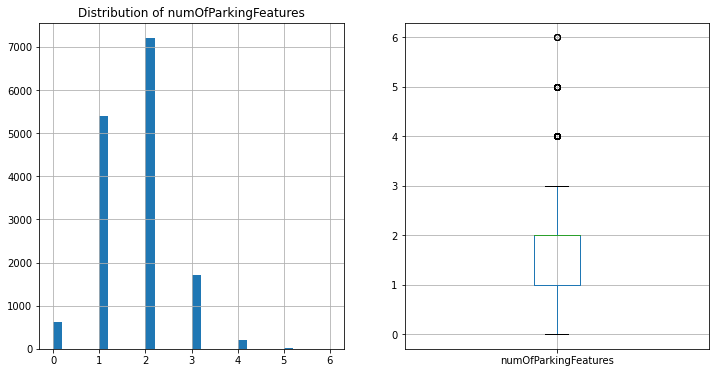

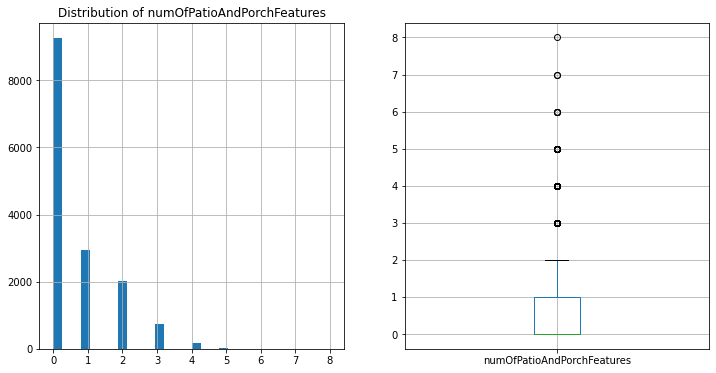

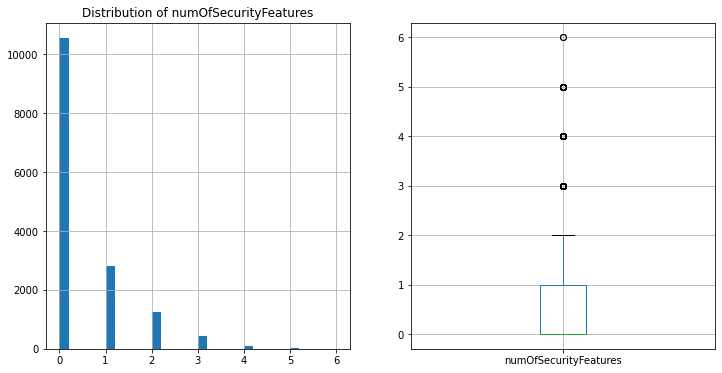

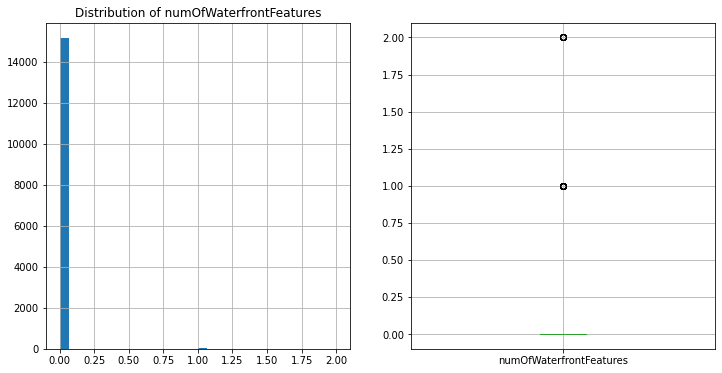

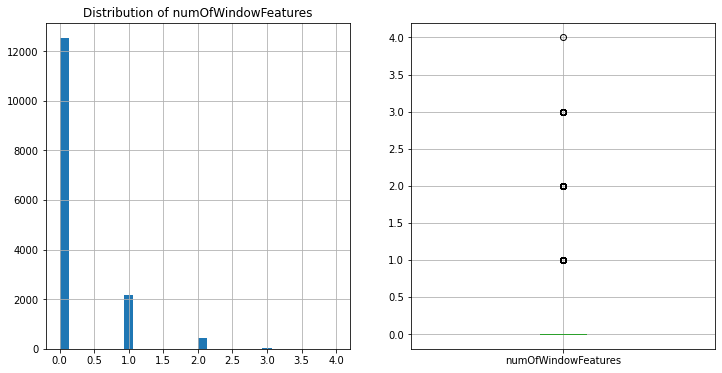

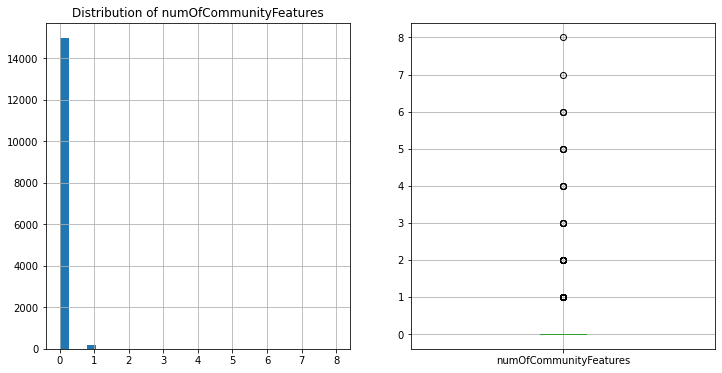

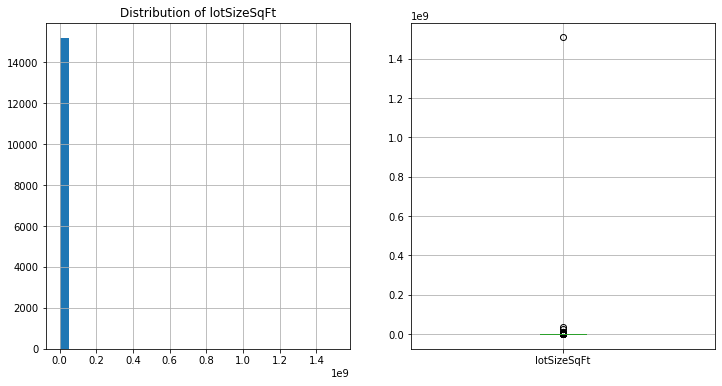

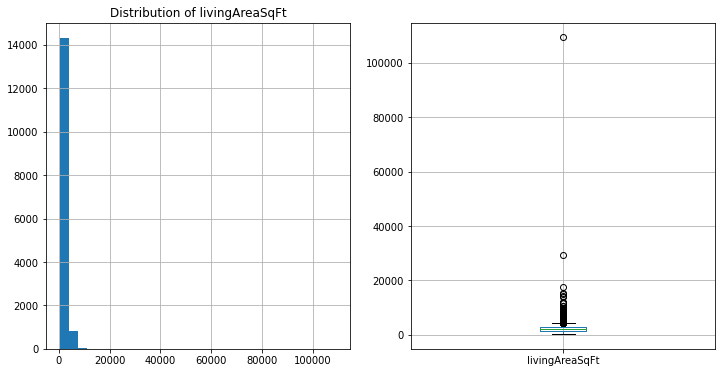

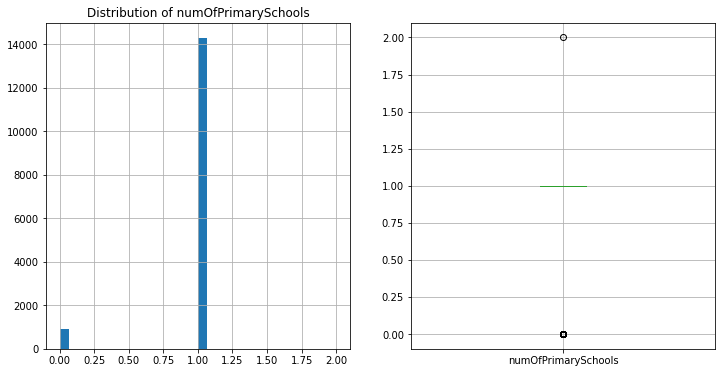

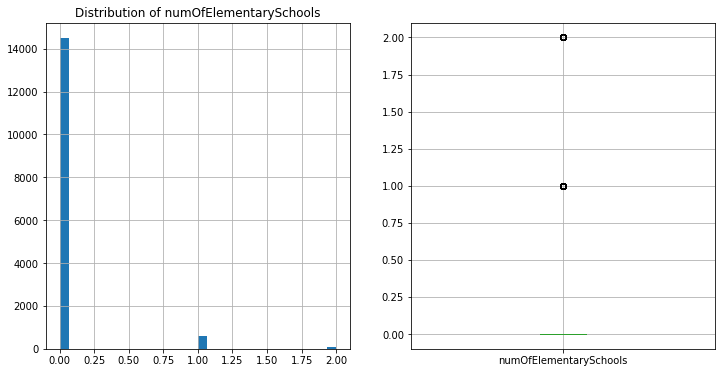

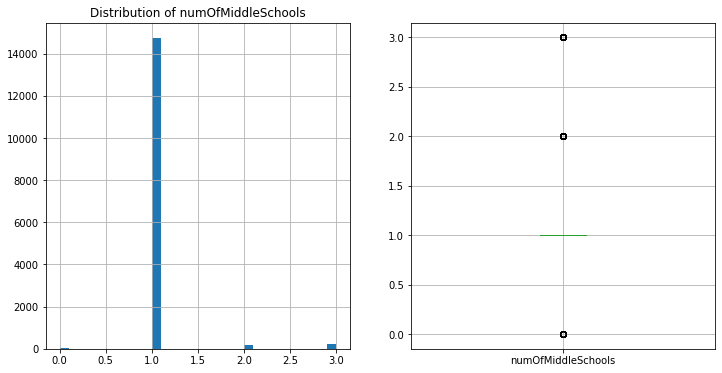

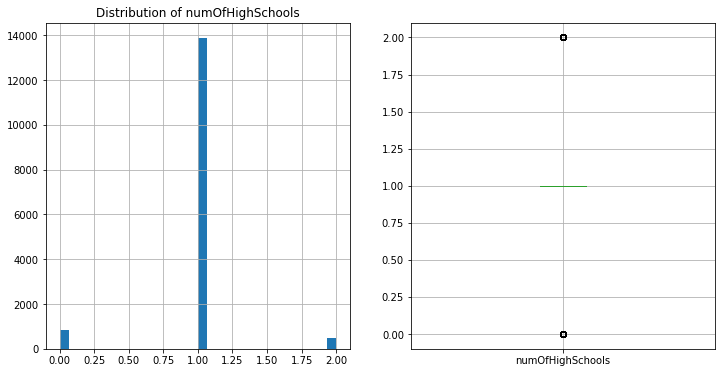

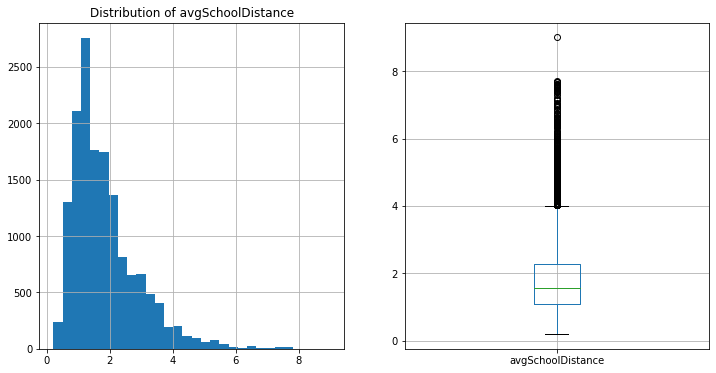

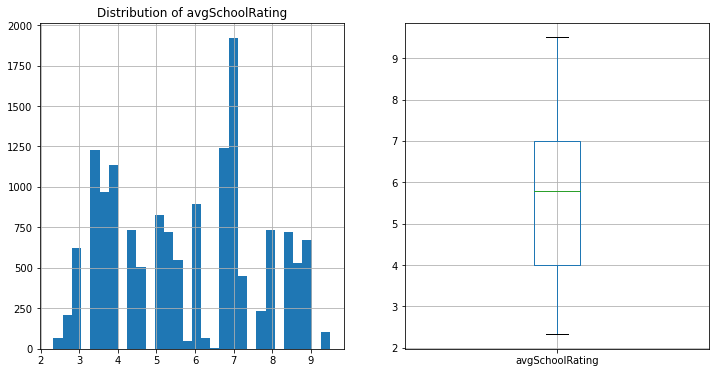

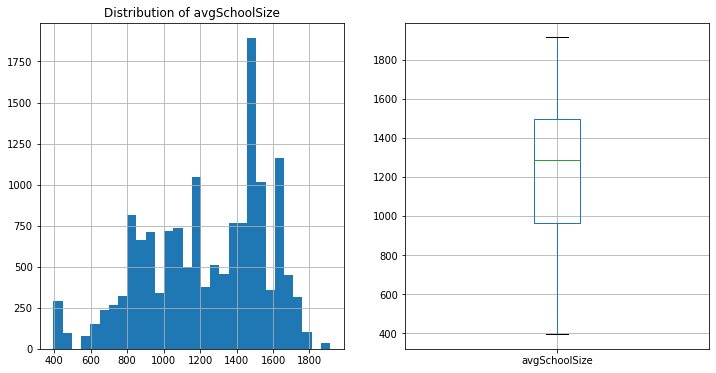

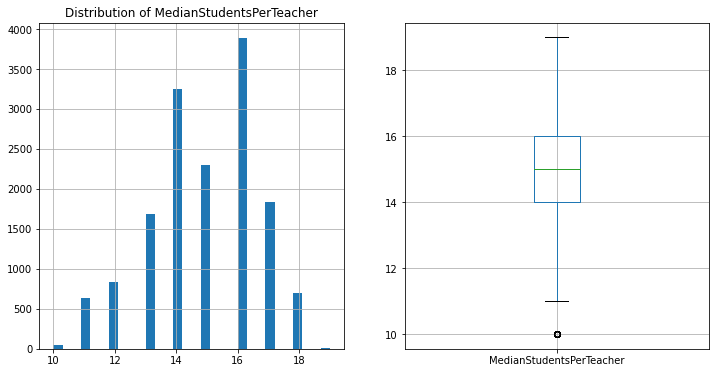

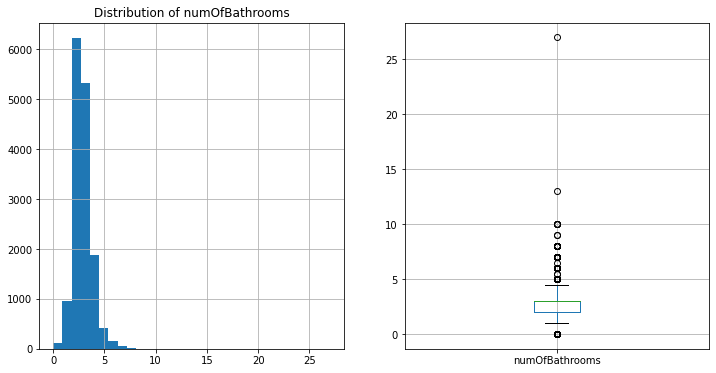

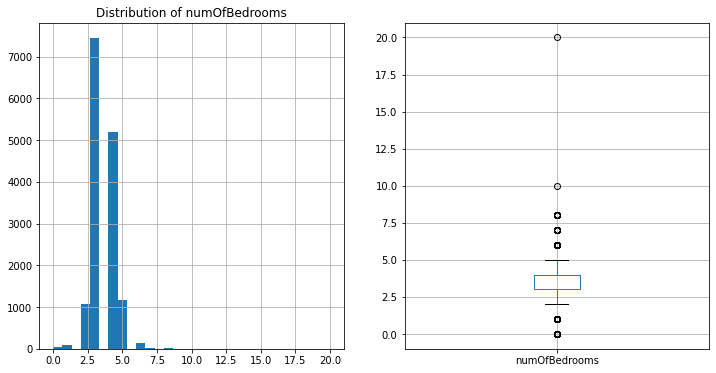

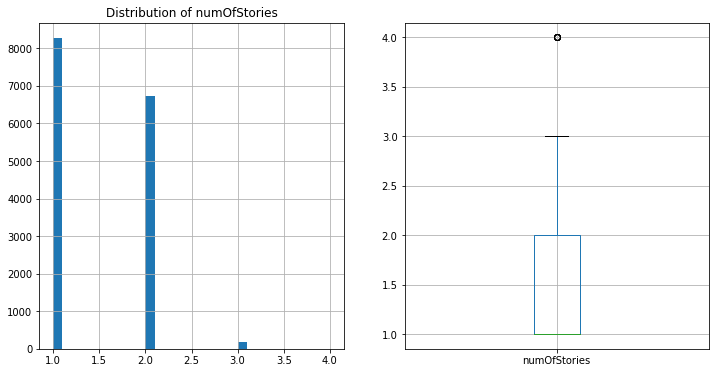

In [ ]:
#Create histogram and boxplot for each relevant feature
for col in dfnumericals.columns:
    # and for each column we create space for one row with 2 charts 
    f, axes = plt.subplots(1, 2, figsize=(12, 6))
    # our first chart is a histogram and we set the title 
    dfnumericals[col].hist(bins = 30, ax = axes[0])
    axes[0].set_title('Distribution of '+ col)
    # our second column is the boxplot 
    dfnumericals.boxplot(column = col, ax = axes[1])
    # we then use this to command to display the charts
    plt.show()

Conclusions drawn from plotting the histogram and boxplot

1. Peak number of houses in the dataset have been built between 2000 and 2005
2. However the median ranges around the year 1990 
3. The latest Price has a median of around half a million but there are many points that exist beyond 2 million mark - outliers
4. There are many other columns which have outliers


In [ ]:
#Identify the correlations across features especially against the Price column which would be our target column for prediction
dfnumericals[['propertyTaxRate','garageSpaces','parkingSpaces','latestPrice','numPriceChanges','numOfAccessibilityFeatures','lotSizeSqFt','livingAreaSqFt','numOfPrimarySchools','avgSchoolDistance','numOfBathrooms','numOfBedrooms']].corr()

,propertyTaxRate,garageSpaces,parkingSpaces,latestPrice,numPriceChanges,numOfAccessibilityFeatures,lotSizeSqFt,livingAreaSqFt,numOfPrimarySchools,avgSchoolDistance,numOfBathrooms,numOfBedrooms
propertyTaxRate,1.000000,0.026430,0.024371,-0.062179,-0.028945,-0.015598,-0.001985,0.062476,0.027431,-0.011178,0.066139,0.098455
garageSpaces,0.026430,1.000000,0.997321,0.157443,0.120748,0.070329,0.022792,0.155533,-0.054775,0.079953,0.199309,0.163637
parkingSpaces,0.024371,0.997321,1.000000,0.156811,0.121268,0.070547,0.022805,0.154132,-0.053558,0.078813,0.198224,0.162546
latestPrice,-0.062179,0.157443,0.156811,1.000000,0.038305,0.016270,0.020940,0.467034,-0.170927,0.094156,0.504738,0.299839
numPriceChanges,-0.028945,0.120748,0.121268,0.038305,1.000000,-0.009819,0.000057,0.088229,-0.028393,0.004918,0.098717,0.093767
numOfAccessibilityFeatures,-0.015598,0.070329,0.070547,0.016270,-0.009819,1.000000,-0.000631,-0.010522,0.002620,-0.009189,-0.007509,-0.020209
lotSizeSqFt,-0.001985,0.022792,0.022805,0.020940,0.000057,-0.000631,1.000000,0.006954,0.001814,-0.000766,0.010426,0.005255
livingAreaSqFt,0.062476,0.155533,0.154132,0.467034,0.088229,-0.010522,0.006954,1.000000,-0.183684,0.228463,0.569282,0.499993
numOfPrimarySchools,0.027431,-0.054775,-0.053558,-0.170927,-0.028393,0.002620,0.001814,-0.183684,1.000000,-0.007133,-0.158008,-0.116627
avgSchoolDistance,-0.011178,0.079953,0.078813,0.094156,0.004918,-0.009189,-0.000766,0.228463,-0.007133,1.000000,0.241788,0.166457


Observations from the Correlation matrix:
1. The property tax as expected is negatively correlated with the Price
2. While the garagespaces, parkingspaces are positively correlated but the highest positive correlation is from livingAreaSqFt and num of Bathrooms (approx 50%) and Bedrooms (approx 30%)
3. Interestingly the number of primary schools is negatively correlated with the price ~upto -17%
4. Also the average school distance is positively correlated with the price which is unintuitive to the commonly expected behaviour
5. The price is higher if the house has adjacent spa comapred to the garage space provided which suggests interests of the clients' preferences

In [ ]:
#Get the full correlation matrix into csv for further assessment
dfall = austindf.corr()
dfall
#Send correlation matrix details to CSV file
dfall.to_csv('/content/drive/MyDrive/Colab Notebooks/Data/housingcorr.csv')

,zpid,zipcode,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,hasCooling,hasGarage,hasHeating,hasSpa,hasView,parkingSpaces,yearBuilt,latestPrice,numPriceChanges,latest_salemonth,latest_saleyear,numOfPhotos,numOfAccessibilityFeatures,numOfAppliances,numOfParkingFeatures,numOfPatioAndPorchFeatures,numOfSecurityFeatures,numOfWaterfrontFeatures,numOfWindowFeatures,numOfCommunityFeatures,lotSizeSqFt,livingAreaSqFt,numOfPrimarySchools,numOfElementarySchools,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories
zpid,1.000000,-0.052805,-0.055352,0.005886,-0.011396,-0.001927,0.107227,-0.051843,0.021325,-0.076695,0.003342,-0.001871,-0.001410,0.213280,0.007503,-0.049541,0.012119,0.053438,-0.012489,0.009341,0.007990,-0.065332,0.021894,0.050612,-0.008117,-0.015926,-0.005383,-0.001200,-0.005400,0.002835,0.001609,-0.002406,0.017113,0.047420,-0.048422,-0.035425,-0.064781,0.052729,-0.037354,-0.001502
zipcode,-0.052805,1.000000,-0.036440,-0.126135,-0.172846,-0.016600,-0.005704,0.075049,-0.033000,0.051158,-0.013173,-0.057906,-0.016687,-0.016143,-0.145946,-0.043115,0.000116,-0.011057,-0.011971,-0.009582,0.016811,-0.084353,0.005276,0.006647,-0.006901,0.015497,-0.004587,-0.014560,-0.035656,-0.051990,0.071017,-0.024317,0.054053,0.027830,0.055618,0.140192,0.106682,-0.055685,0.025278,-0.051818
latitude,-0.055352,-0.036440,1.000000,0.347597,0.450187,0.019153,-0.056766,0.037770,0.017619,0.028263,0.051272,0.036431,0.018222,-0.116519,0.071547,0.013402,-0.001667,-0.042536,0.046059,-0.014039,0.007396,0.149610,-0.017172,-0.027001,0.018687,0.018692,0.008238,0.001960,0.084065,-0.054942,0.128212,-0.019787,0.130216,-0.043530,0.260637,0.077653,-0.010083,0.053388,0.078542,0.047176
longitude,0.005886,-0.126135,0.347597,1.000000,-0.013746,-0.115317,-0.299097,-0.063926,-0.033348,-0.040448,-0.095771,-0.124299,-0.114713,-0.252537,-0.184079,-0.050127,-0.004023,-0.018003,-0.107296,0.015458,-0.024084,-0.012009,-0.086942,-0.088481,-0.018438,-0.120293,-0.045765,0.000490,-0.334297,0.163411,-0.029789,-0.220102,0.452437,-0.288116,-0.557531,-0.333619,-0.597129,-0.335719,-0.285123,-0.157333
propertyTaxRate,-0.011396,-0.172846,0.450187,-0.013746,1.000000,0.026430,0.125105,0.034295,0.016016,0.021256,0.015793,0.041076,0.024371,0.118247,-0.062179,-0.028945,0.005714,-0.024598,0.030728,-0.015598,0.018595,0.267883,0.003888,0.014315,-0.007266,0.018862,0.039874,-0.001985,0.062476,0.027431,-0.051873,-0.020720,-0.034695,-0.011178,0.184755,0.158509,-0.021681,0.066139,0.098455,0.057537
garageSpaces,-0.001927,-0.016600,0.019153,-0.115317,0.026430,1.000000,0.044129,0.061061,0.822110,0.052476,0.249585,0.199268,0.997321,0.085982,0.157443,0.120748,0.102118,0.311164,0.271191,0.070329,0.180231,0.642852,0.235368,0.161646,0.041336,0.051723,0.056693,0.022792,0.155533,-0.054775,0.029057,0.044912,-0.064993,0.079953,0.092672,0.034451,0.062567,0.199309,0.163637,0.094983
hasAssociation,0.107227,-0.005704,-0.056766,-0.299097,0.125105,0.044129,1.000000,0.077942,0.005075,0.030312,0.037776,0.098390,0.044155,0.616010,-0.005043,-0.028790,-0.021630,-0.028142,0.066010,-0.030886,0.070080,-0.005995,0.018440,0.105011,-0.008907,0.108053,0.042180,-0.008068,0.278659,-0.140680,0.125484,0.114608,-0.027227,0.309472,0.297089,0.408835,0.239780,0.336580,0.226482,0.308490
hasCooling,-0.051843,0.075049,0.037770,-0.063926,0.034295,0.061061,0.077942,1.000000,0.055453,0.679140,0.030556,0.028798,0.060564,0.097967,0.010075,0.043981,0.001865,0.008780,0.104664,0.007056,0.189035,0.095131,0.067302,0.062992,-0.001935,0.049795,0.005184,0.001095,0.054849,-0.013090,0.003104,0.011005,-0.005690,0.005214,0.071524,0.106567,0.092889,0.124231,0.116861,0.043509
hasGarage,0.021325,-0.033000,0.017619,-0.033348,0.016016,0.822110,0.005075,0.055453,1.000000,0.059077,0.172085,0.182396,0.818608,0.047808,0.074161,0.130483,0.079542,0.365466,0.280621,0.059536,0.187483,0.737658,0.239138,0.163995,0.038385,0.063206,0.051689,0.007444,0.046600,-0.01730

Draw Seaborn pairplots to visualize the key feature correlations, identify the influence of outliers and also to determine how the data is spread based on some of the key categorical variables such as City or HomeType

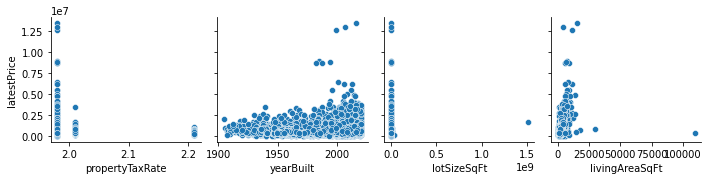

In [ ]:
#Draw Seaborn pairplots to visualize the key feature correlations
sns.pairplot(austindf, x_vars=['propertyTaxRate','yearBuilt','lotSizeSqFt','livingAreaSqFt'],y_vars=['latestPrice'])

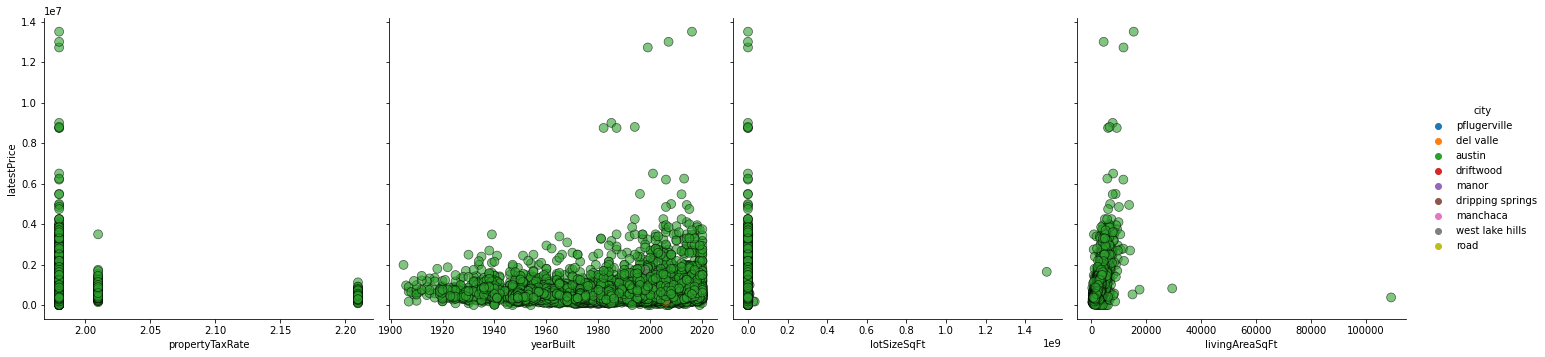

In [ ]:
#Let's pivot the data using the categorical features like 'city' or 'homeType' with a color code
sns.pairplot(austindf, x_vars=['propertyTaxRate','yearBuilt','lotSizeSqFt','livingAreaSqFt'],y_vars=['latestPrice'], hue='city',diag_kind = 'kde', 
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'}, height = 5)

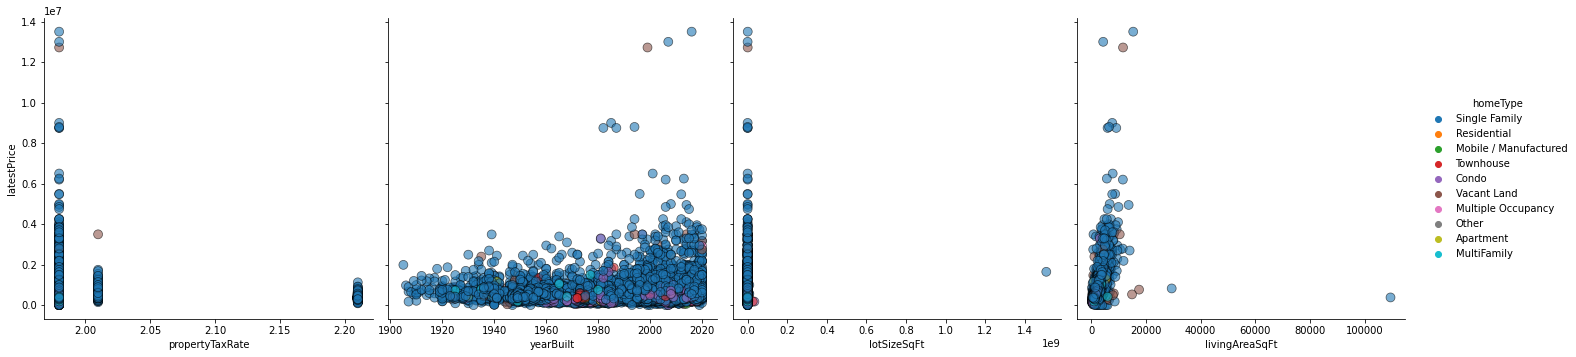

In [ ]:
sns.pairplot(austindf, x_vars=['propertyTaxRate','yearBuilt','lotSizeSqFt','livingAreaSqFt'],y_vars=['latestPrice'], hue='homeType',diag_kind = 'kde', 
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'}, height = 5)

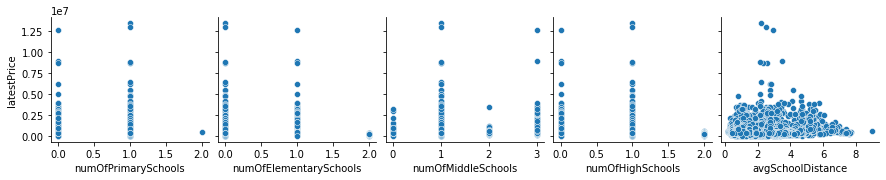

In [ ]:
sns.pairplot(austindf, x_vars=['numOfPrimarySchools','numOfElementarySchools','numOfMiddleSchools','numOfHighSchools','avgSchoolDistance'],y_vars=['latestPrice'])


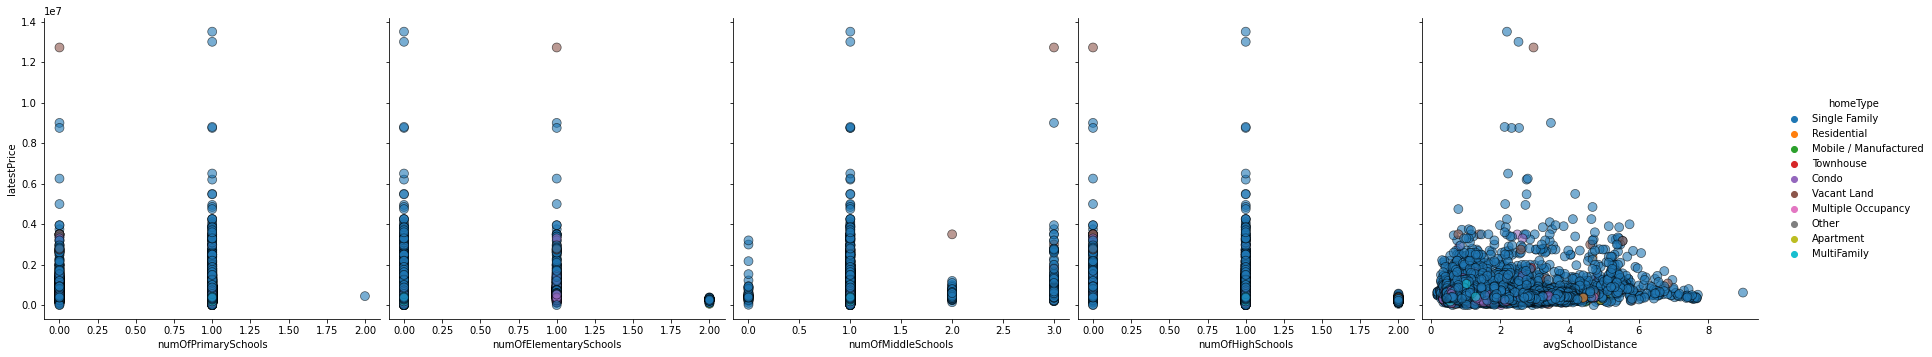

In [ ]:
sns.pairplot(austindf, x_vars=['numOfPrimarySchools','numOfElementarySchools','numOfMiddleSchools','numOfHighSchools','avgSchoolDistance'],y_vars=['latestPrice'],hue='homeType',diag_kind = 'kde', 
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'}, height = 5)

In [ ]:
#The outliers can influence the spread of data around the mean which can sometimes corrupt the understanding of the dataset patterns. 
#For example in the pairplot above, the numOfPrimary schools is negatively correlated with the price due to the influence of outlier data

#Remove the outliers based on the criteria of 
# outlier = mean+-(3*std)

austindf_copy = austindf.copy()

# define the columns, identified for removing outliers
numeric_column = ['garageSpaces', 'parkingSpaces', 'avgSchoolDistance', 'livingAreaSqFt', 'numOfPrimarySchools']
# define a function to return a list of index values for outliers
def get_outliers(data,columns):
    outlier_idxs = []
    for col in columns:
        elements = data[col]
        mean = elements.mean()
        sd = elements.std()
        outliers_mask = data[(data[col] > mean+3*sd) | (data[col] <mean-3*sd)].index
        outlier_idxs += [x for x in outliers_mask]
        return list(set(outlier_idxs))
    
# call the function to get the outliers
austin_outliers = get_outliers(austindf_copy,numeric_column)

# drop the outliers
autin_X = austindf_copy.drop(austin_outliers, axis=0)
autin_X.shape


(15025, 47)

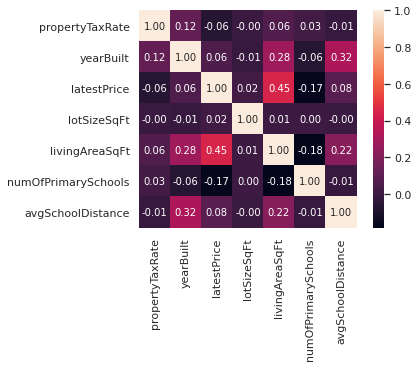

In [ ]:
# Correlation coefficients and preparing a heatmap for key features
cols = ['propertyTaxRate','yearBuilt','latestPrice','lotSizeSqFt','livingAreaSqFt','numOfPrimarySchools', 'avgSchoolDistance']
corr_mat = np.corrcoef(autin_X[cols].values.T)
sns.set(font_scale=1)
full_mat = sns.heatmap(corr_mat, cbar=True, annot=True, square=True, fmt='.2f',annot_kws= {'size': 10}, yticklabels=cols, xticklabels=cols)
plt.show()

**Standardization** - **Normalization**
The standard scaling from sklearn applied on the numerical columns ensures that each feature is set to normalization with a z-score of mean=0 and std deviation =1

In [ ]:
# this function loops through columns in a data set and defines a predefined scaler to each

austindf_scaling = austindf.copy()
numcols = austindf_scaling.select_dtypes(include=np.number)
def scale_numeric(data, numeric_column, scaler):
    for col in numeric_column:
        data[col] = scaler.fit_transform(data[col].values.reshape(-1, 1))
    return data

# we can now define the scaler we want to use and apply it to our dataset 
scaler = StandardScaler()
austindf_scaling = scale_numeric(austindf_scaling, numcols, scaler)
# here we can see the result 
austindf_scaling[0:5]

,zpid,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,hasCooling,hasGarage,hasHeating,hasSpa,hasView,homeType,parkingSpaces,yearBuilt,latestPrice,numPriceChanges,latest_saledate,latest_salemonth,latest_saleyear,latestPriceSource,numOfPhotos,numOfAccessibilityFeatures,numOfAppliances,numOfParkingFeatures,numOfPatioAndPorchFeatures,numOfSecurityFeatures,numOfWaterfrontFeatures,numOfWindowFeatures,numOfCommunityFeatures,lotSizeSqFt,livingAreaSqFt,numOfPrimarySchools,numOfElementarySchools,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,homeImage
0,0.021873,pflugerville,14424 Lake Victor Dr,-4.019137,"14424 Lake Victor Dr, Pflugerville, TX 78660 i...",1.433803,1.362892,-0.265248,0.570097,True,True,True,True,False,False,Single Family,0.573298,1.086498,-0.458476,0.790858,2019-09-02,0.720434,-0.096130,"Coldwell Banker United, Realtors - South Austin",0.394795,-0.072369,0.805624,0.367601,0.342191,3.072484,-0.044819,1.620901,-0.091173,-0.009229,0.284852,0.250831,-0.209308,-0.136519,0.07945,-0.535249,-1.673595,-0.533854,-0.492151,0.300632,0.658444,1.017276,111373431_ffce26843283d3365c11d81b8e6bdc6f-p_f...
1,0.051839,pflugerville,1104 Strickling Dr,-4.019137,Absolutely GORGEOUS 4 Bedroom home with 2 full...,1.454849,1.379193,-0.265248,0.570097,True,True,True,True,False,False,Single Family,0.573298,1.132840,-0.480543,-0.817305,2020-10-13,1.038231,1.132501,Agent Provided,-0.077472,-0.072369,-1.307102,0.367601,-0.674331,-0.566287,-0.044819,-0.426958,-0.091173,-0.009215,-0.319415,0.250831,-0.209308,-0.136519,0.07945,-0.410445,-1.673595,-0.533854,-0.492151,-0.647765,0.658444,-0.892288,120900430_8255c127be8dcf0a1a18b7563d987088-p_f...
2,6.227972,pflugerville,1408 Fort Dessau Rd,-4.019137,Under construction - estimated completion in A...,1.218441,1.638033,-0.265248,-0.909113,True,True,False,True,False,False,Single Family,-0.905241,1.364549,-0.566327,-0.817305,2019-07-31,0.084838,-0.096130,Agent Provided,-1.352592,-0.072369,0.277442,-0.900446,-0.674331,0.646637,-0.044819,-0.426958,-0.091173,-0.009079,-0.529784,-3.977348,8.303877,-0.136519,0.07945,-0.597651,-1.494404,-0.396030,-0.492151,-0.647765,-0.518146,-0.892288,2084491383_a2ad649e1a7a098111dcea084a11c855-p_...
3,0.051842,pflugerville,1025 Strickling Dr,-4.019137,Absolutely darling one story home in charming ...,1.449066,1.379644,-0.265248,0.570097,True,True,True,True,False,False,Single Family,0.573298,1.132840,-0.601910,0.388817,2018-08-08,0.402636,-1.324760,Agent Provided,-1.022006,-0.072369,-1.835284,0.367601,-0.674331,-0.566287,-0.044819,-0.426958,-0.091173,-0.009222,-0.384702,0.250831,-0.209308,-0.136519,0.07945,-0.410445,-1.673595,-0.533854,-0.492151,-0.647765,-0.518146,-0.892288,120901374_b469367a619da85b1f5ceb69b675d88e-p_f...
4,-0.139289,pflugerville,15005 Donna Jane Loop,-4.019137,Brimming with appeal & warm livability! Sleek ...,1.503275,1.436293,-0.265248,-0.909113,True,True,False,True,False,False,Single Family,-0.905241,0.623079,-0.602131,-0.013224,2018-10-31,1.038231,-1.324760,Agent Provided,-0.171926,-0.072369,-1.835284,-0.900446,-0.674331,-0.566287,-0.044819,-0.426958,-0.091173,-0.009172,-0.055366,0.250831,-0.209308,-0.136519,0.07945,-0.660053,-0.956832,-0.043812,-0.492151,0.300632,-0.518146,1.017276,60134862_b1a48a3df3f111e005bb913873e98ce2-p_f.jpg


**Model building exercise**
The goal of machine learning is to build models which can enable the underlying dataset capable of providing the right metrics and levers for predicting the target feature given a different dataset

Split the dataset for training and testing

In [ ]:
"""###  : Split the data
* In order to train our model and see how well it performs, we need to split our data into training and testing sets.
* We can then train our model on the training set, and test how well it has generalised to the data on the test set.
* There are a number of options for how we can split the data, and for what proportion of our original data we set aside for the test set.
"""
# Consider the numerical columns relevant for the modelling
# a common way for splitting our dataset is using train_test_split 

X_train, X_test, Y_train, Y_test = model_selection.train_test_split(dfnumericals, dfnumericals['latestPrice'], test_size = 0.3, random_state = 5)

# get shape of test and training sets
print('Training Set:')
print('Number of datapoints: ', X_train.shape[0])
print('Number of features: ', X_train.shape[1])
print('\n')
print('Test Set:')
print('Number of datapoints: ', X_test.shape[0])
print('Number of features: ', X_test.shape[1])

Training Set:
Number of datapoints:  10619
Number of features:  32


Test Set:
Number of datapoints:  4552
Number of features:  32


**Linear Regression Modelling using Sklearn**


In [ ]:
### Train and Test the Model

lm = LinearRegression()

# fitting the model to the data means to train our model on the data
# the fit function takes both the X and y variables of the training data 
lm.fit(X_train, Y_train)

# from this, we can generate a set of predictions on our unseen features, X_test
Y_pred = lm.predict(X_test)

Mean squared error:  1.4356072092970547e-18
Mean absolute error:  9.735221697323627e-10
R^2 :  1.0


9.735221697323627e-10

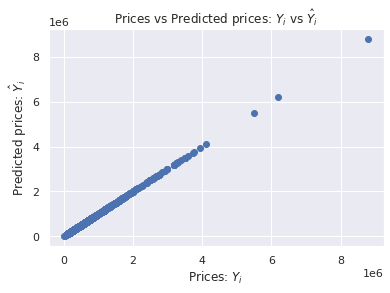

In [ ]:
def evaluate(Y_test, Y_pred):
    # this block of code returns all the metrics we are interested in 
    mse = metrics.mean_squared_error(Y_test, Y_pred)
    msa = metrics.mean_absolute_error(Y_test, Y_pred)
    r2 = metrics.r2_score(Y_test, Y_pred)

    print("Mean squared error: ", mse)
    print("Mean absolute error: ", msa)
    print("R^2 : ", r2)
    
    # this creates a chart plotting predicted and actual 
    plt.scatter(Y_test, Y_pred)
    plt.xlabel("Prices: $Y_i$")
    plt.ylabel("Predicted prices: $\hat{Y}_i$")
    plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

evaluate(Y_test, Y_pred)

# we can explore how metrics are dervied in a little more detail by looking at MAE
# here we will implement MAE using numpy, building it up step by step

# with MAE, we get the absolute values of the error - as you can see this is of the difference between the actual and predicted values
np.abs(Y_test - Y_pred)

# we will then sum them up 
np.sum(np.abs(Y_test - Y_pred))

# then divide by the total number of predictions/actual values
# as you will see, we get to the same score implemented above 
np.sum(np.abs(Y_test - Y_pred))/len(Y_test)

The R2 score is measure of how well we can explain the variability in the model - by what percentage can we explain the best fit of the target feature with the collective consideration of all independent features on a scale of 0 to 100%

Forward Selection method